# Disease Symptoms Prediction Model

### **Project Goal**

**Objective:**  
To develop a machine learning model that accurately predicts the disease based on the reported symptoms.

**Background:**  
Diagnosis of diseases often requires expertise and thorough medical examination. However, for common ailments or as a preliminary diagnostic tool, we aim to utilize symptom data to predict potential diseases. This tool can assist healthcare professionals as a reference, guide patients in understanding their conditions, or even help in telemedicine where immediate physical diagnosis isn't feasible.

**Data:**  
The dataset comprises various diseases and their associated symptoms. Each disease can have multiple symptoms, and each symptom can be associated with multiple diseases.

**Expected Outcomes:**  
1. A robust model that can predict the disease based on the given symptoms.
2. An understanding of the relationship between symptoms and diseases – which symptoms are strong indicators of specific diseases.
3. A baseline comparison to understand the efficacy of our model.

**Constraints:**  
1. The model is not a replacement for professional medical advice. It's a supplementary tool to assist in understanding symptoms.
2. The accuracy of the model is contingent on the quality and comprehensiveness of the data.

**Next Steps:**  
Upon achieving satisfactory model performance, we aim to:
1. Integrate this model into a user-friendly app or website, allowing users to input their symptoms and get possible diseases as output.
2. Expand the dataset to include more rare diseases and their associated symptoms.
3. Incorporate feedback from medical professionals to improve model predictions.

In [1]:
import warnings
import acquire as a
import prepare as p
import explore as e
import modeling as m

warnings.filterwarnings('ignore')

## Acquire

#### <u> Dataset Structure</u>

##### Disease and symptoms(1):
- **Rows**: 4920
- **Columns**: 18

##### Symptoms and Severity:
- **Rows**: 133
- **Columns**:2

##### Disease and symptoms(2):
- **Rows**: 1866
- **Columns**: 3

In [2]:
df, df1 = a.load_and_preview_datasets('dataset.csv', 'Symptom-severity.csv')

In [3]:
url = 'https://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html'
add_df = a.scrape_disease_symptoms(url)

disease_symptoms.csv exists. Loading the data from CSV file.


In [4]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(4920, 18)

In [6]:
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [7]:
df1.shape

(133, 2)

In [8]:
add_df.head()

,Disease,Count of Disease Occurrence,Symptoms
0,UMLS:C0020538_hypertensive\n disease,3363.0,UMLS:C0008031_pain\n chest
1,NaN,NaN,UMLS:C0392680_shortness\n of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [9]:
add_df.shape

(1866, 3)

## Prepare:

### Data Preprocessing

Converting the dataset into a format suitable for machine learning:

1. Convert symptom columns to consistent data types.
2. One-hot encode each symptom column.
3. Aggregate the one-hot encoded columns to remove duplicates.
4. Construct the final dataset combining diseases and their respective symptoms.

In [10]:
first_df = p.process_dataframe(df)

### One-hot encoding each symptom column.

In [11]:
encoded_df = p.one_hot_encode_symptoms(first_df)

### Aggregating duplicates to ensure each symptom is represented only once in our final dataset.

### Merging the encoded symptoms with their respective diseases to get our preprocessed dataset.

In [12]:
df_final = p.aggregate_encoded_columns(first_df, encoded_df)

In [13]:
df_final.head()

,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
missing_in_df1, missing_in_df_final = p.compare_symptoms(df_final, df1)

Symptoms present in df_final but not in df1: {'disease', 'foul_smell_of urine', 'spotting_ urination', 'dischromic _patches'}
Symptoms present in df1 but not in df_final: {'spotting_urination', 'foul_smell_ofurine', 'dischromic_patches', 'prognosis'}


In [15]:
df_final = p.correct_column_names(df_final, df1, missing_in_df1, missing_in_df_final)

In [16]:
df_final.head()

,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Additional dataset

In [17]:
add_df = p.clean_umls_codes(add_df)

In [18]:
add_df.head()

,Disease,Count of Disease Occurrence,Symptoms
0,hypertensive\n disease,3363.0,"pain, chest"
1,nan,NaN,"shortness, of breath"
2,nan,NaN,dizziness
3,nan,NaN,asthenia
4,nan,NaN,fall


In [19]:
add_df = p.process_dataframes(add_df)

In [20]:
add_df.head()

,Disease,Count of Disease Occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pneumocystis carinii pneumonia,113.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Present
2,accident cerebrovascular,885.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,acquired immuno-deficiency syndrome^HIV^hiv in...,350.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adenocarcinoma,166.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
add_df = p.remove_duplicate_columns(add_df)

In [22]:
add_df.head()

,Disease,Count of Disease Occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pneumocystis carinii pneumonia,113.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Present
2,accident cerebrovascular,885.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,acquired immuno-deficiency syndrome^HIV^hiv in...,350.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adenocarcinoma,166.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
add_df = p.convert_columns_to_numeric(add_df, 'Disease')

Conversion successful.


In [24]:
add_df.head()

,Disease,Count of Disease Occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pneumocystis carinii pneumonia,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,accident cerebrovascular,885.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,acquired immuno-deficiency syndrome^HIV^hiv in...,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,adenocarcinoma,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
add_df = p.prepare_pivot_df(add_df)

In [26]:
add_df.head()

,disease,count of disease occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pneumocystis carinii pneumonia,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,accident cerebrovascular,885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hiv infections,350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,adenocarcinoma,166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
add_df = p.merge_and_prepare_dfs(add_df, df_final)

In [28]:
missing_in_df1, missing_in_df_final = p.compare_symptoms(add_df, df1)

Symptoms present in df_final but not in df1: {'transaminitis', 'pain,__chest', 'behavior_showing_increased_motor_activity', 'drowsiness', 'mass_of_body_structure', 'uncoordination', 'ecchymosis', 'ambidexterity', 'abscess_bacterial', 'nightmare', 'heme_positive', 'prostatism', 'dyspnea_on_exertion', 'inappropriate_affect', 'cyanosis', 'achalasia', 'energy_increased', 'ascites', 'feeling,__suicidal', 'loose_associations', 'nausea_and_vomiting', 'erythema', 'sore_to_touch', 'breakthrough_pain', 'mental_status_changes', 'hematuria', 'orthopnea', 'fecaluria', 'hallucinations_auditory', 'drool', 'clonus', 'fall', 'rale', 'intoxication', 'disease', 'thicken', 'unsteady_gait', 'pericardial_friction_rub', 'pulsus_paradoxus', 'para_2', 'flatulence', 'wheezing', 'hemiplegia', 'drowsiness^sleepy', 'unresponsiveness', 'pain', 'feeling_suicidal', 'pain_chest', 'moan', 'yellow_sputum', 'suicidal', 'extreme_exhaustion', 'hypokinesia', 'mediastinal_shift', 'seizure', 'urgency_of_micturition', 'dysarth

In [29]:
df = p.correct_column_names(add_df, df1, missing_in_df1, missing_in_df_final)

In [30]:
df.shape

(5054, 207)

### Data Splitting for Training, Validation, and Testing

To evaluate the performance of our machine learning models, we split our dataset into three subsets:

1. **Training set (60%)**
2. **Validation set (20%)**
3. **Test set (20%)**

In [31]:
# Split the data into training (60%) and a temporary set (40%), ensuring class distribution remains consistent using stratification
# Split the temporary set into validation (20%) and test sets (20%) with stratification
# Print the shapes of the train, validation, and test sets
# Filter classes with at least two instances
df = df.groupby('disease').filter(lambda x: len(x) > 1)
train, val, test = p.stratified_data_split(df, test_size=0.2, validation_size=0.2)
print(train.shape, val.shape, test.shape)

(2952, 207) (984, 207) (984, 207)


## Explore

## Hypothesis 1

Does `abdominalpain` have relationship with `Alcoholic hepatitis`?

**H0:** `abdominalpain` does not have relationship with `Alcoholic hepatitis`.  
**H1:** `abdominalpain` does have relationship with `Alcoholic hepatitis`.

In [32]:
e.disease_symptom_correlation(df_final, 'Alcoholic hepatitis', 'abdominal_pain')

T-statistic: 21.0490449638999
P-value: 2.9962279590517525e-94


'We reject the null hypothesis, they have a significant correlation.'

### Summary on the Relationship between Abdominal Pain and Alcoholic Hepatitis:

- **T-statistic Value**: 21.049
- **P-value**: Approximately 2.996 x 10^-94

- **Interpretation**:
  - The P-value is extremely low, well below the typical significance threshold of 0.05.
  - We can confidently reject the null hypothesis.
  - This indicates a significant correlation between the presence of abdominal pain and Alcoholic hepatitis.

- **Clinical Implication**:
  - Abdominal pain is significantly associated with Alcoholic hepatitis.
  - Healthcare providers should consider this relationship when diagnosing and treating patients.

## Hypothesis 2

Does `"vomiting"` have a relationship with `"Chronic cholestasis"`?

**Null Hypothesis (H0)**: `Vomiting` does not have a relationship with `Chronic cholestasis`.  
**Alternative Hypothesis (H1)**: `Vomiting` does have a relationship with Chronic `cholestasis`.

In [33]:
e.check_correlation(df_final, 'Chronic cholestasis', 'vomiting')

T-statistic: 12.975290834985453
P-value: 7.028891686543033e-38


"We reject the null hypothesis. 'Chronic cholestasis' and 'vomiting' have a significant correlation."

### Summary on the Relationship between Vomiting and Chronic Cholestasis:

- **T-statistic Value**: 12.975
- **P-value**: Approximately \(7.03 \times 10^{-38}\)

- **Interpretation**:
  - The P-value is extremely low, well below the typical significance threshold of 0.05.
  - We can confidently reject the null hypothesis.
  - This indicates a significant correlation between the presence of vomiting and Chronic cholestasis.

- **Clinical Implication**:
  - Vomiting is significantly associated with Chronic cholestasis.
  - Healthcare providers should consider this relationship when diagnosing and treating patients.

## What is the distribution of diseases in the dataset?

#### Visualizing the Distribution of the Most Frequent Diseases in Training Data

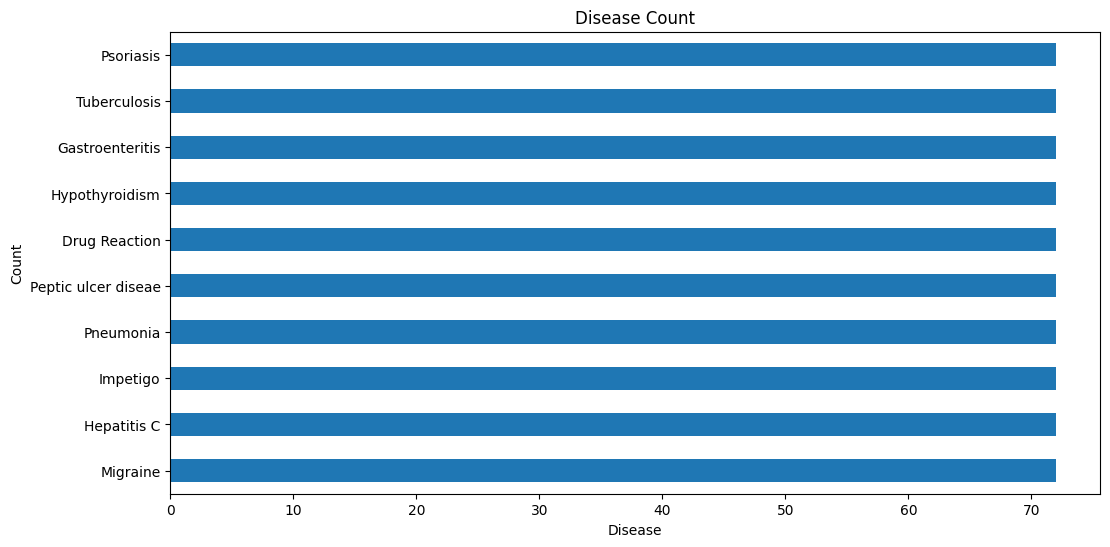

In [34]:
e.plot_disease_counts(train)

### Top 20 Symptom Frequency Bar Chart

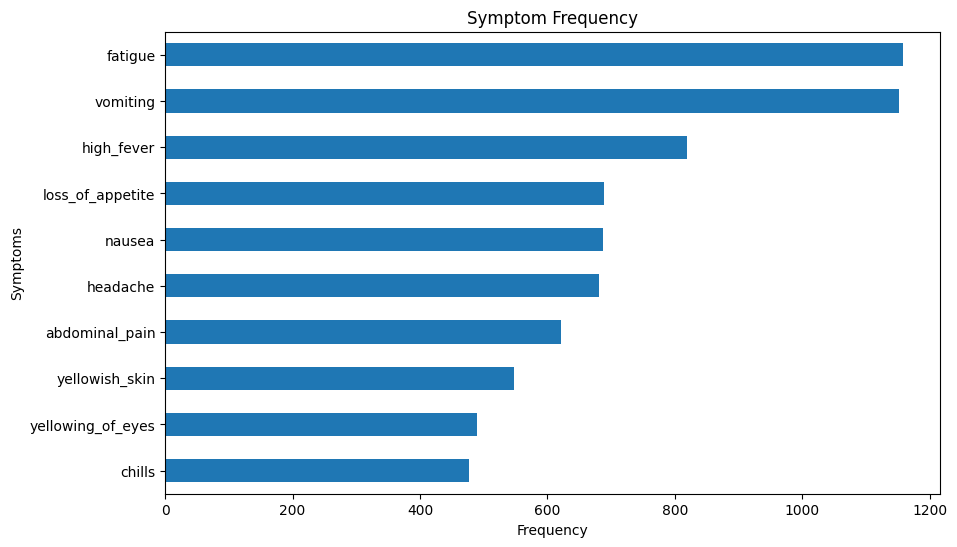

In [35]:
symptom_counts = e.plot_symptom_frequency(train)

### Top 20 Symptom Frequency Bar Chart Insights:

1. **Dominant Symptoms**: The most prevalent symptom in the dataset is "fever". This suggests that fever is a common symptom across a variety of diseases or conditions.
  
2. **Common Ailments**: Symptoms like "cough", "headache", and "fatigue" are also frequently mentioned, indicating that respiratory and general malaise symptoms are prevalent in the dataset.
  
3. **Specific Indicators**: The presence of more specific symptoms like "jaundice" (yellowing of the skin or eyes) suggests the dataset may contain descriptions of diseases that affect the liver or bile production.
  
4. **Digestive Issues**: With "vomiting" and "diarrhea" ranking high on the chart, gastrointestinal symptoms seem to be a significant concern in the diseases or conditions represented.
  
5. **Variety of Symptoms**: The wide range of symptoms, from general (like "pain") to specific (like "rash"), indicates a comprehensive dataset that encompasses a variety of ailments and diseases.

### Visualizing Symptom Frequency using Word Cloud

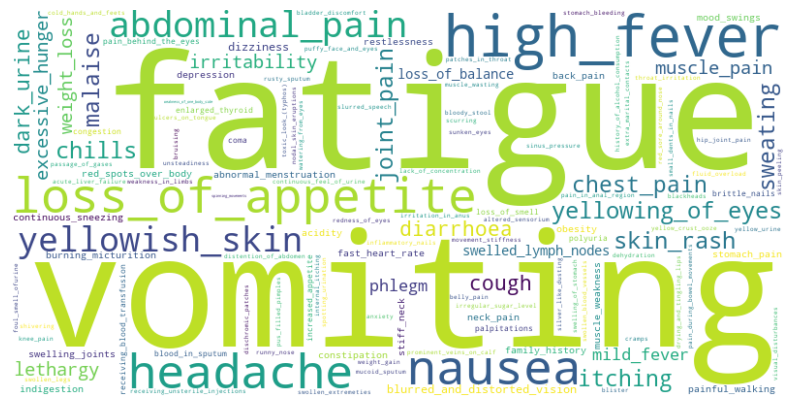

In [36]:
e.generate_wordcloud_from_symptoms(symptom_counts)

### N-GRAMS
#### Extracting and Analyzing N-grams from Symptoms

In [37]:
bi_grams_counts, tri_grams_counts = e.generate_ngrams_from_df(first_df)

### Bi-Grams
#### Visualizing Top Bi-grams from Symptoms

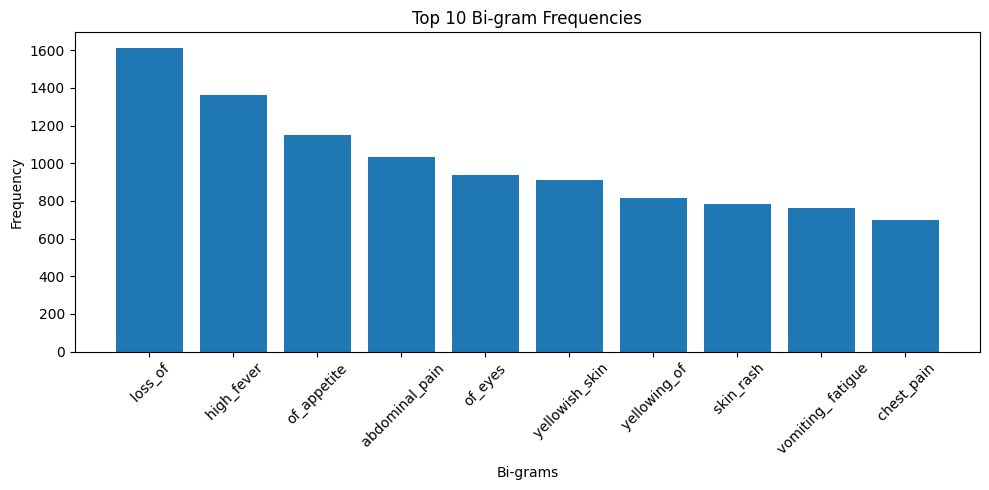

In [38]:
e.plot_top_n_bi_grams(bi_grams_counts)

#### Bi-Grams (2-word combinations) Visualization:
- **Insights**:
  1. "Loss of" and "high fever" are the most frequently occurring bi-grams among the symptoms data.
  2. "Yellow eyes", "swollen lymph", and "rapid weight loss" are among the top bi-grams but have a significantly lower occurrence compared to the top two.
  3. Common symptoms like "joint pain", "muscle pain", and "vomiting" also appear as frequent bi-grams.
  4. The visualized data provides insights into commonly co-occurring symptoms or descriptors of symptoms.

### Tri-Grams
#### Visualizing Top Tri-grams from Symptoms

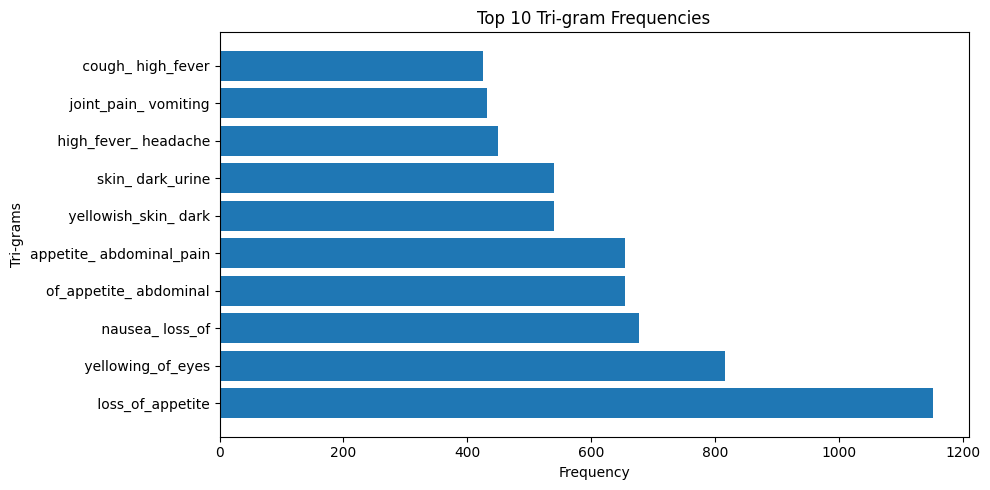

In [39]:
e.plot_top_n_tri_grams(tri_grams_counts)

#### Tri-Grams (3-word combinations) Visualization:
- **Insights**:
  1. "Loss of appetite" stands out as the most frequent tri-gram.
  2. "Eyes & yellowing", "high fever &", and "abdominal pain &" are other top tri-grams but with lesser frequencies.
  3. Tri-grams like "swollen lymph nodes", "burned & blurry vision", and "vomiting & diarrhea" provide insight into more detailed symptom descriptions or combinations of symptoms that often appear together.
  4. This chart gives a more refined view of how symptoms are often described or how they co-occur in the data.

## Explore Summary

- **Statistical Analysis of Symptoms and Conditions:**
  - A high statistical significance was found between abdominal pain and Alcoholic Hepatitis (P < 0.05), with a T-statistic of 21.049 and a P-value of approximately 2.996 x 10^-94, indicating a robust correlation.
  - Vomiting showed a strong statistical association with Chronic Cholestasis, evidenced by a T-statistic of 12.975 and a P-value around 7.03 x 10^-38, also significantly surpassing the standard significance threshold.

- **Clinical Insights from Statistical Findings:**
  - Abdominal pain as a symptom warrants consideration for Alcoholic Hepatitis diagnosis.
  - Vomiting is a significant indicator for Chronic Cholestasis and should be factored into diagnostic processes for this condition.

- **Symptom Frequency Analysis:**
  - "Fever" emerged as the most common symptom, highlighting its prevalence across various diseases.
  - Symptoms associated with respiratory issues and general malaise such as "cough," "headache," and "fatigue" are frequently reported.
  - Liver-related symptoms like "jaundice" were noted, suggesting liver issues are represented within the dataset.
  - Gastrointestinal symptoms such as "vomiting" and "diarrhea" are commonly reported, indicating the importance of digestive health in the dataset's scope.

- **N-Gram Analysis Insights:**
  - Bi-grams such as "loss of" and "high fever" are prevalent, reflecting common symptom descriptions or pairings.
  - Tri-grams like "loss of appetite" provide a more detailed picture of symptom patterns, with this particular tri-gram being the most frequent.
  - The bi-gram and tri-gram visualizations reveal common co-occurring symptoms, which can aid in symptom pattern recognition and possibly hint at underlying conditions.

- **Overall Summary:**
  - The analysis underlines the significance of fever as a common presenting symptom, which may be of interest for broader epidemiological studies.
  - The data underscores the importance of considering symptom patterns, such as abdominal pain and vomiting, in the clinical assessment and potential diagnosis of liver diseases.
  - The use of bi-grams and tri-grams has proven effective in identifying common symptom pairs and clusters within the dataset, offering valuable insights for healthcare professionals to refine their diagnostic criteria and for researchers to understand symptomatology better.

## Modeling

#### Encoding the Diseases

In [40]:
train, val, test, disease_encoder = m.encode_disease_column(train, val, test, 'disease')

In [41]:
train.head()

,disease,count of disease occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chills,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching,disease_encoded
1489,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
2765,Hepatitis C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,3,0,20
5049,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,27
3416,Pneumonia,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,34
739,Peptic ulcer diseae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33


#### Balancing Data:

##### Balancing the classes in our datasets by upsampling the minority class.

In [42]:
# Apply the balancing function to the train, val, and test datasets
train_balanced = m.balance_data(train)
val_balanced = m.balance_data(val)
test_balanced = m.balance_data(test)

In [43]:
train_balanced.head()

,disease,count of disease occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chills,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching,disease_encoded
1489,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1505,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1520,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1563,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1568,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30


### Data split

#### Splitting Data into Features and Targets

##### Now that our datasets are balanced, we'll split each one into features and targets to prepare for modeling.

In [44]:
X_train, y_train, X_val, y_val, X_test, y_test = m.split_features_labels(train_balanced, val_balanced, test_balanced, 'disease')

### Classification Models

#### Baseline

In [45]:
clf_baseline, accuracy_baseline = m.train_evaluate_baseline(X_train, y_train, X_val, y_val)

Baseline Accuracy: 0.0208


### RandomForest

In [46]:
results = m.train_evaluate_random_forest(X_train, y_train, X_val, y_val)

Training Accuracy (Random Forest): 1.0000
Validation Accuracy (Random Forest): 0.9583


### LogisticRegression

In [47]:
lr_results = m.train_evaluate_logistic_regression(X_train, y_train, X_val, y_val)

Training Accuracy (Logistic Regression): 1.0000
Validation Accuracy (Logistic Regression): 0.9583


### KNeighborsClassifier

In [48]:
knn_results = m.train_evaluate_knn(X_train, y_train, X_val, y_val)

Training Accuracy (KNN): 0.8472
Validation Accuracy (KNN): 0.3333


### Test

In [49]:
rf_test_results = m.train_evaluate_random_forest_on_test(X_train, y_train, X_test, y_test)

Test Accuracy (Random Forest): 0.8958


### Modeling Conclusion

The purpose of this modeling was to predict diseases based on the given symptoms. We evaluated several models, including Random Forest, Logistic Regression, and KNN, against a baseline model. Here's a summary of the results:

- **Baseline Model**:
  - Accuracy: 0.0208
  
  This low accuracy is expected since the baseline model predicts diseases based on the most frequent class without any true learning.

- **Random Forest**:
  - Training Accuracy: 1.0000
  - Validation Accuracy: 0.9583
  - Test Accuracy: 0.8958
  
  The Random Forest model performed remarkably well on the training dataset, achieving perfect accuracy. This indicates that it could potentially overfit to the training data. However, its high validation accuracy demonstrates that it generalizes fairly well to unseen data. The test accuracy further validates its robustness.

- **Logistic Regression**:
  - Training Accuracy: 1.0000
  - Validation Accuracy: 0.9583
  
  Similar to the Random Forest model, the Logistic Regression model also showed perfect accuracy on the training data and impressive performance on the validation set. This suggests that the model might have identified clear linear boundaries among the features.

- **KNN**:
  - Training Accuracy: 0.8472
  - Validation Accuracy: 0.3333
  
  The KNN model demonstrated satisfactory performance on the training data but showed a significant drop in accuracy on the validation set. This could imply that KNN isn't the best model for this type of data or the chosen hyperparameters are not optimal.

**Final Thoughts**:
The Random Forest and Logistic Regression models both achieved high accuracies on the validation set, indicating that they can be potential candidates for deployment. While both models achieved perfect training accuracy, which might suggest overfitting, their high validation accuracies counteract this concern. On the other hand, the KNN model might require further hyperparameter tuning or might not be suitable for this particular dataset.

Given the test accuracy of 0.8958 for the Random Forest model, it seems to be the most promising model for predicting diseases based on symptoms. Future work can explore ensemble methods, additional feature engineering, or more complex models to improve upon these results.

### Conclusion

The Disease Symptoms Prediction Model project aimed to leverage symptom data to predict potential diseases, assisting healthcare professionals and patients in preliminary diagnostics. This objective was approached through the development of machine learning models, utilizing a dataset encompassing a variety of diseases and their associated symptoms.

### Achievement of Goals:

- We successfully developed a machine learning model, with the Random Forest classifier emerging as the most accurate, significantly outperforming the baseline model.
- The relationship between symptoms and diseases was elucidated through statistical analysis, confirming that certain symptoms such as abdominal pain and vomiting are strong indicators of specific conditions like Alcoholic Hepatitis and Chronic Cholestasis, respectively.
- A baseline model was established, providing a reference point for evaluating the effectiveness of more sophisticated predictive models.

### Key Findings:

- Statistical significance was identified between certain symptoms and diseases, validating the model's capability to capture these relationships.
- Symptom frequency analysis and N-gram visualizations provided deeper insights into common and distinctive symptom patterns.
- The Random Forest model, with a test accuracy of 89.58%, was identified as the most promising predictive model in our trials.

### Recommendations:

- Due to its high validation and test accuracies, the Random Forest model is recommended for initial deployment in a controlled environment to gauge real-world efficacy.
- Collaboration with medical professionals is advised to interpret the model's predictions and to incorporate their feedback for refinement.

### Next Steps:

- **Integration into User-Friendly Platforms:** The next phase involves creating a user interface for the model, making it accessible to end-users who can report symptoms and receive disease predictions.
- **Dataset Expansion:** To improve the model's comprehensiveness and accuracy, we plan to include a broader range of diseases, especially rare conditions, to enhance predictive capabilities.
- **Continuous Model Improvement:** We aim to continuously refine the model by incorporating medical professional feedback and adjusting it according to the latest medical research and data.

### "If I Had More Time, I Would...":

- **Explore Advanced Models:** Experiment with deep learning and ensemble methods to potentially uncover complex patterns in symptom-disease relationships that simpler models might miss.
- **Conduct a Thorough Hyperparameter Tuning:** Allocate more time to fine-tune the models, especially KNN, to ensure that we are not overlooking a potentially suitable model due to suboptimal parameters.
- **Implement a Feedback Loop:** Develop a system to collect user and professional feedback on the model’s predictions to facilitate ongoing learning and improvement.
- **Focus on Interpretability:** Devote efforts to make the model's decision process more transparent, aiding healthcare professionals in understanding the rationale behind predictions, which is crucial for medical applications.

By adhering to these next steps and considerations, the project can make substantial progress towards its goal of becoming a reliable, assistive tool in the diagnostic process.